In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from test_model import test_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sc_sharp import scSHARP
import utilities
from sklearn import preprocessing

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
grid_results = pd.read_csv("grid_search_jung_output/combined.csv", header=None, index_col=0)
grid_results.columns = ["Total Accuracy", "Val Accuracy", "Test Accuracy", "Total SD", "Val SD", "Test SD", "Config", "Dropout", "Batch", "Neighbors"]
grid_results['GCN Layers'] = grid_results['Config'].apply(lambda x: x.split('_')[0])
grid_results['Final Embedding'] = grid_results['Config'].apply(lambda x: x.split('_')[1].split(".")[0])
grid_results['GCN Layers'] = pd.to_numeric(grid_results['GCN Layers'])
grid_results['Final Embedding'] = pd.to_numeric(grid_results['Final Embedding'])
grid_results.sort_values("Val Accuracy", ascending=False).head(10)

,Total Accuracy,Val Accuracy,Test Accuracy,Total SD,Val SD,Test SD,Config,Dropout,Batch,Neighbors,GCN Layers,Final Embedding
0,,,,,,,,,,,,
127,0.931358,0.988372,0.0,0.001228,0.006588,0.0,2_15.txt,0.0,20,2,2,15
1,0.931358,0.988372,0.0,0.001022,0.005481,0.0,2_25.txt,0.0,20,2,2,25
4,0.931069,0.986822,0.0,0.000975,0.005232,0.0,2_25.txt,0.0,35,2,2,25
145,0.930925,0.986047,0.0,0.001328,0.007124,0.0,2_60.txt,0.0,20,2,2,60
130,0.930925,0.986047,0.0,0.000914,0.004903,0.0,2_15.txt,0.0,35,2,2,15
16,0.930780,0.985271,0.0,0.001066,0.005720,0.0,2_25.txt,0.0,95,2,2,25
148,0.930636,0.984496,0.0,0.001180,0.006329,0.0,2_60.txt,0.0,35,2,2,60
13,0.930636,0.984496,0.0,0.000963,0.005168,0.0,2_25.txt,0.0,80,2,2,25
160,0.930636,0.984496,0.0,0.000681,0.003654,0.0,2_60.txt,0.0,95,2,2,60


In [42]:
set(range(1,217))-set(grid_results.index.to_numpy())

set()

In [ ]:
# selecting 1 because Sd is lower and accuracy tied

In [7]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


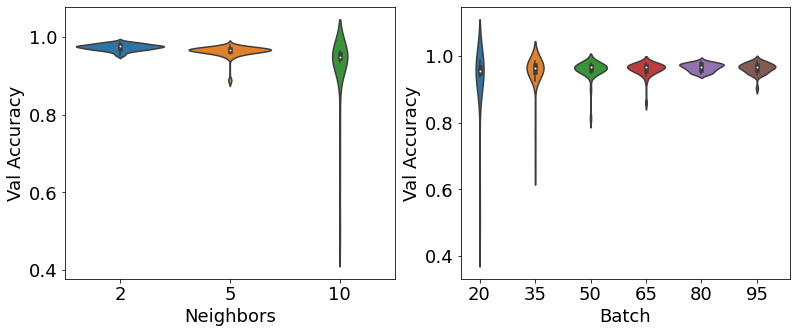

In [8]:
fig, axs = plt.subplots(1,2, figsize=(13, 5))
sns.violinplot(x=grid_results["Neighbors"], y=grid_results["Val Accuracy"], ax = axs[0])
sns.violinplot(x=grid_results["Batch"], y=grid_results["Val Accuracy"], ax = axs[1])
plt.plot()
plt.savefig("figures/jung_param1.pdf", format="pdf", bbox_inches="tight")
plt.show()

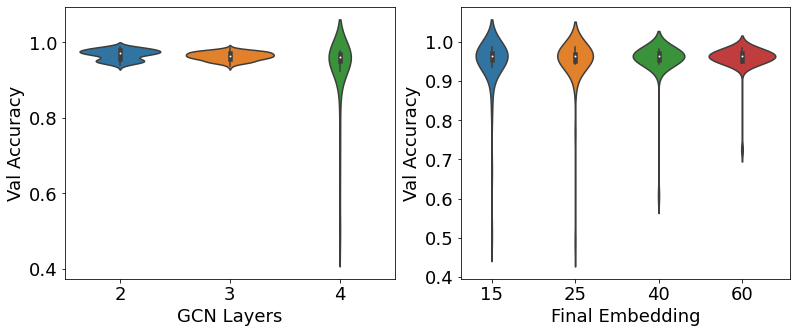

In [9]:
fig, axs = plt.subplots(1,2,figsize=(13, 5))
sns.violinplot(x=grid_results["GCN Layers"], y=grid_results["Val Accuracy"], ax = axs[0])
sns.violinplot(x=grid_results["Final Embedding"], y=grid_results["Val Accuracy"], ax = axs[1])
plt.plot()
plt.savefig("figures/jung_param2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [2]:
data_folders = ["/home/groups/ConradLab/daniel/sharp_data/jung/"]
tools = ["sctype","scsorter","scina"]
votes_necessary = .51
model_file = "configs/2_25.txt"
neighbors = 2
batch_size=20
training_epochs=150
random_inits = 5
counts="counts.csv"
meta="labels.csv"
meta_col = 0

In [6]:
results = test_model(data_folders, tools, votes_necessary, model_file, neighbors, batch_size, training_epochs, random_inits, counts=counts, meta=meta, meta_col=meta_col)
results

Loss in epoch 0 = 16.210896
Loss in epoch 10 = 0.018369
Loss in epoch 20 = 0.005205
Loss in epoch 30 = 0.002262
Loss in epoch 40 = 0.001475
Loss in epoch 50 = 0.000886
Loss in epoch 60 = 0.000512
Loss in epoch 70 = 0.000433
Loss in epoch 80 = 0.000277
Loss in epoch 90 = 0.000228
Loss in epoch 100 = 0.000140
Loss in epoch 110 = 0.000128
Loss in epoch 120 = 0.000096
Loss in epoch 130 = 0.000076
Loss in epoch 140 = 0.000060
Loss in epoch 0 = 17.218880
Loss in epoch 10 = 0.018071
Loss in epoch 20 = 0.005925
Loss in epoch 30 = 0.002656
Loss in epoch 40 = 0.001549
Loss in epoch 50 = 0.000966
Loss in epoch 60 = 0.000632
Loss in epoch 70 = 0.000405
Loss in epoch 80 = 0.000340
Loss in epoch 90 = 0.000252
Loss in epoch 100 = 0.000190
Loss in epoch 110 = 0.000137
Loss in epoch 120 = 0.000121
Loss in epoch 130 = 0.000085
Loss in epoch 140 = 0.000071
Loss in epoch 0 = 18.265646
Loss in epoch 10 = 0.018950
Loss in epoch 20 = 0.006333
Loss in epoch 30 = 0.002913
Loss in epoch 40 = 0.001669
Loss in ep

/home/users/lewinsda/scSHARP/utilities.py:185: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return float((torch.tensor(preds) == torch.tensor(real)).type(torch.FloatTensor).mean().numpy())


,data_name,method,total_accuracy,train_accuracy,test_accuracy,total_sd,train_sd,test_sd
0,jung,GCN,0.861561,0.865325,0.808696,0.001209,0.000000,0.018188
1,jung,Max Col.,0.807803,0.865325,0.000000,0.000000,0.000000,0.000000
2,jung,Confident Labels,NaN,0.865325,NaN,0.000000,0.000000,0.000000
3,jung,sctype,0.848266,0.863777,0.630435,0.000000,0.000000,0.000000
4,jung,scsorter,0.774566,0.828173,0.021739,0.000000,0.000000,0.000000
5,jung,scina,0.539017,0.577399,0.000000,0.000000,0.000000,0.000000
6,jung,Tool Avg.,0.720617,0.756450,0.217391,0.161529,0.156081,0.357871


In [3]:
results = test_model(data_folders, tools, votes_necessary, model_file, neighbors, batch_size, training_epochs, random_inits, counts=counts, meta=meta, meta_col=meta_col)
results

Loss in epoch 0 = 16.210825
Loss in epoch 10 = 0.018367
Loss in epoch 20 = 0.005205
Loss in epoch 30 = 0.002201
Loss in epoch 40 = 0.001476
Loss in epoch 50 = 0.000887
Loss in epoch 60 = 0.000513
Loss in epoch 70 = 0.000433
Loss in epoch 80 = 0.000277
Loss in epoch 90 = 0.000228
Loss in epoch 100 = 0.000140
Loss in epoch 110 = 0.000128
Loss in epoch 120 = 0.000096
Loss in epoch 130 = 0.000076
Loss in epoch 140 = 0.000060
Loss in epoch 0 = 17.219116
Loss in epoch 10 = 0.018071
Loss in epoch 20 = 0.005925
Loss in epoch 30 = 0.002656
Loss in epoch 40 = 0.001549
Loss in epoch 50 = 0.000966
Loss in epoch 60 = 0.000632
Loss in epoch 70 = 0.000404
Loss in epoch 80 = 0.000340
Loss in epoch 90 = 0.000252
Loss in epoch 100 = 0.000190
Loss in epoch 110 = 0.000137
Loss in epoch 120 = 0.000121
Loss in epoch 130 = 0.000085
Loss in epoch 140 = 0.000071
Loss in epoch 0 = 18.265821
Loss in epoch 10 = 0.018950
Loss in epoch 20 = 0.006333
Loss in epoch 30 = 0.002913
Loss in epoch 40 = 0.001667
Loss in ep

/home/users/lewinsda/scSHARP/utilities.py:185: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return float((torch.tensor(preds) == torch.tensor(real)).type(torch.FloatTensor).mean().numpy())


,data_name,method,total_accuracy,train_accuracy,test_accuracy,total_sd,train_sd,test_sd
0,jung,GCN,0.861561,0.865325,0.808696,0.001209,0.000000,0.018188
1,jung,Max Col.,0.807803,0.865325,0.000000,0.000000,0.000000,0.000000
2,jung,Confident Labels,NaN,0.865325,NaN,0.000000,0.000000,0.000000
3,jung,sctype,0.848266,0.863777,0.630435,0.000000,0.000000,0.000000
4,jung,scsorter,0.774566,0.828173,0.021739,0.000000,0.000000,0.000000
5,jung,scina,0.539017,0.577399,0.000000,0.000000,0.000000,0.000000
6,jung,Tool Avg.,0.720617,0.756450,0.217391,0.161529,0.156081,0.357871


(0.0, 1.0)

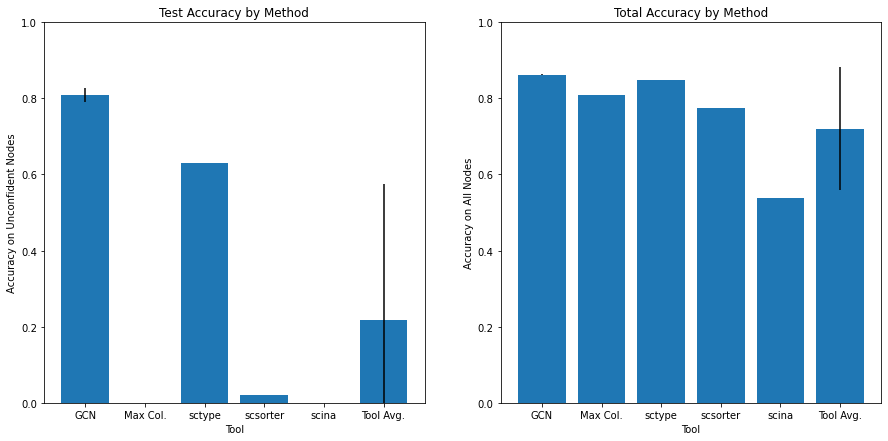

In [7]:
to_plot = results.loc[results['method']!="Confident Labels",:]
fig, ax = plt.subplots(1,2,figsize=(15, 7))
ax[0].bar(to_plot['method'],  to_plot['test_accuracy'], yerr= to_plot['test_sd'], align='center')
ax[0].set_xlabel("Tool")
ax[0].set_ylabel("Accuracy on Unconfident Nodes")
ax[0].set_title("Test Accuracy by Method")
ax[1].bar(to_plot['method'],  to_plot['total_accuracy'], yerr= to_plot['total_sd'], align='center')
ax[1].set_xlabel("Tool")
ax[1].set_ylabel("Accuracy on All Nodes")
ax[1].set_title("Total Accuracy by Method")
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])

In [3]:
real_labels = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/jung/labels.csv", index_col=0).iloc[:,0]
real_labels,keys = pd.factorize(real_labels, sort=True)
keys

Index(['spc', 'spd', 'spg'], dtype='object')

In [16]:
len(real_labels[keep_cells][real_labels[keep_cells]==0])

244

In [10]:
len(real_labels)

1192

In [5]:
data_path = "/home/groups/ConradLab/daniel/sharp_data/jung/counts.csv"
tool_preds = "/home/groups/ConradLab/daniel/sharp_data/jung/preds.csv"
tool_list = ["scina", "scsorter", "sctype"]
marker_path = "/home/groups/ConradLab/daniel/sharp_data/jung/markers.txt"
neighbors=2
config="configs/2_25.txt"
sharp = scSHARP(data_path, tool_preds, tool_list, marker_path, neighbors, config)

In [6]:
preds, train_nodes, test_nodes, keep_cells = sharp.run_prediction(training_epochs=150, thresh=0.51, batch_size=20, seed=8)

Loss in epoch 0 = 16.796789
Loss in epoch 10 = 0.020264
Loss in epoch 20 = 0.005037
Loss in epoch 30 = 0.002458
Loss in epoch 40 = 0.001600
Loss in epoch 50 = 0.000825
Loss in epoch 60 = 0.000617
Loss in epoch 70 = 0.000485
Loss in epoch 80 = 0.000300
Loss in epoch 90 = 0.000252
Loss in epoch 100 = 0.000175
Loss in epoch 110 = 0.000128
Loss in epoch 120 = 0.000157
Loss in epoch 130 = 0.000080
Loss in epoch 140 = 0.000076


In [7]:
results = utilities.validation_metrics(torch.tensor(real_labels[keep_cells]), preds.cpu(), train_nodes, test_nodes)
results

(0.8627167344093323,
 array([[160,  80,   4],
        [ 10, 146,   0],
        [  1,   0, 291]]),
 0.8653250932693481,
 array([[136,  74,   2],
        [ 10, 142,   0],
        [  1,   0, 281]]),
 0.8260869383811951,
 array([[24,  6,  2],
        [ 0,  4,  0],
        [ 0,  0, 10]]))

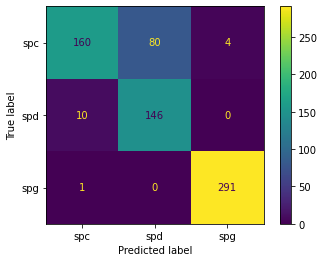

In [17]:
d = ConfusionMatrixDisplay(results[1], display_labels = keys)
d.plot()
#plt.show()
plt.savefig('figures/jung_all_cm.pdf')  

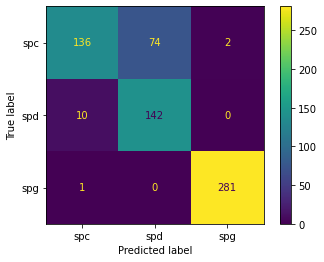

In [18]:
d = ConfusionMatrixDisplay(results[3], display_labels = keys)
d.plot()
#plt.show()
plt.savefig('figures/jung_train_cm.pdf') 

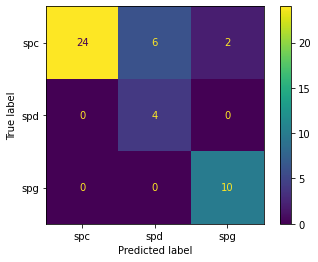

In [6]:
d = ConfusionMatrixDisplay(results[5], display_labels = keys)
d.plot()
#plt.show()
plt.savefig('figures/jung_test_cm.pdf') 

In [15]:
len(test_nodes)

46

In [19]:
np.count_nonzero(preds.cpu()[test_nodes] == 0)

24

In [3]:
_,marker_names = utilities.read_marker_file("/home/groups/ConradLab/daniel/sharp_data/jung/markers.txt")
all_labels = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/jung/preds.csv", index_col=0)
all_labels_factored = utilities.factorize_df(all_labels, marker_names)
encoded_labels = utilities.encode_predictions(all_labels_factored)
#encoded_labels[test_nodes,:]

In [22]:
pd.Series(preds.cpu().numpy()).to_csv("/home/groups/ConradLab/daniel/sharp_data/jung/sharp_preds.csv")

In [7]:
int_df = sharp.run_interpretation()

int_df.columns = keys
reorg_keys = ["spg","spc","spd"]
int_df = int_df[reorg_keys]
int_df = int_df.abs()
scale_int_df = pd.DataFrame(preprocessing.scale(int_df, with_mean=False))
scale_int_df.columns = int_df.columns
scale_int_df.index = int_df.index
scale_int_df.sort_values("spc", ascending=False).head(4)

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


,spg,spc,spd
Ldhc,0.351632,23.709996,4.615430
Ubb,2.220421,21.834673,8.753378
Fabp9,0.258119,21.452827,3.565026
Pabpc1,3.990908,20.404309,9.974965


In [17]:
scale_int_df.to_csv("jung_interpretation.csv")

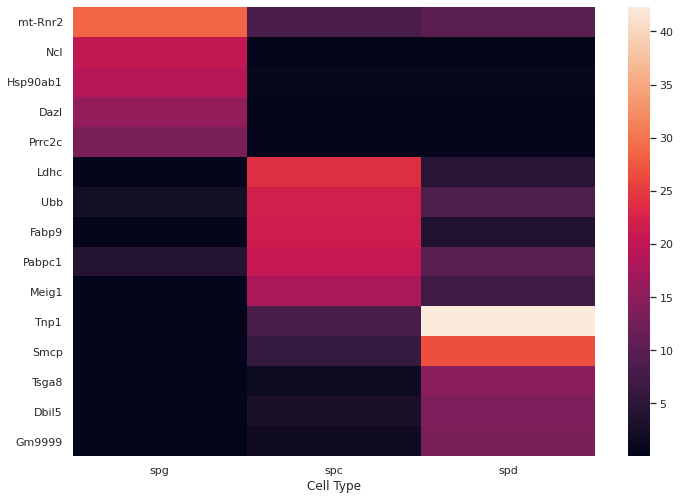

In [20]:
markers = ["mt-Rnr2", "Ncl", "Hsp90ab1", "Dazl", "Prrc2c", "Ldhc", "Ubb", "Fabp9", "Pabpc1", "Meig1", "Tnp1", "Smcp", "Tsga8", "Dbil5", "Gm9999"]
sns.set(rc={'figure.figsize':(11.7,8.27)})
#scale_int_df = np.arcsinh(scale_int_df)
ax = sns.heatmap(scale_int_df.loc[markers,:])
ax.set(xlabel="Cell Type")
plt.plot()
plt.savefig("figures/jung_att_heatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()
#ax.savefig("jung_att_heatmap.pdf", format="pdf", bbox_inches="tight")
#ax.legend()

[]

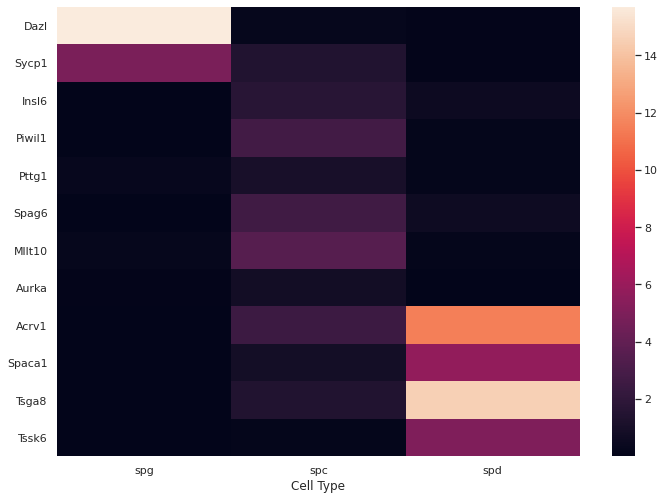

In [16]:
# actual markers heatmap
markers = ['Dazl','Sycp1','Insl6','Piwil1','Pttg1','Spag6','Mllt10','Aurka','Acrv1','Spaca1','Tsga8','Tssk6']
sns.set(rc={'figure.figsize':(11.7,8.27)})
#scale_int_df = np.arcsinh(scale_int_df)
ax = sns.heatmap(scale_int_df.loc[markers,:])
ax.set(xlabel="Cell Type")
plt.plot()

In [9]:
scale_int_df.sort_values("spg", ascending=False).head(10)

,spg,spc,spd
mt-Rnr2,28.580413,8.294124,10.026773
Ncl,20.230924,0.180933,0.079943
Hsp90ab1,19.172715,0.787720,0.718273
Dazl,15.695123,0.201191,0.099891
Prrc2c,13.319144,0.020841,0.427714
Tpr,12.179163,0.040313,0.364510
Anp32b,11.414390,0.259150,0.029915
mt-Nd1,11.120896,0.445073,0.742633
Rpl4,10.892597,0.896439,1.013455
Rbm39,9.742898,0.475481,0.036741


In [12]:
scale_int_df.loc[['Dazl','Sycp1']]

,spg,spc,spd
Dazl,15.695407,0.201094,0.099881
Sycp1,4.868067,1.394191,0.117887


In [11]:
scale_int_df.loc[["Insl6","Piwil1","Pttg1","Spag6","Mllt10","Aurka"]]

,spg,spc,spd
Insl6,0.015655,1.678595,0.542597
Piwil1,0.000611,2.746888,0.141452
Pttg1,0.274248,0.996705,0.130978
Spag6,0.005403,2.688653,0.577020
Mllt10,0.204443,3.554583,0.128367
Aurka,0.116457,0.781402,0.048107


In [13]:
scale_int_df.sort_values("spc", ascending=False).head(10)

,spg,spc,spd
Ldhc,0.351632,23.709996,4.615430
Ubb,2.220421,21.834673,8.753378
Fabp9,0.258119,21.452827,3.565026
Pabpc1,3.990908,20.404309,9.974965
Meig1,0.115687,17.847964,7.053704
Calm2,4.790556,17.533388,1.278982
Morf4l1,0.410265,17.439189,5.575141
Calm1,0.819953,16.447940,3.897635
Tuba3b,1.945053,13.729678,3.524022
Rsph1,0.091812,13.402599,1.445491


In [14]:
scale_int_df.loc[['Acrv1','Spaca1','Tsga8','Tssk6']]

,spg,spc,spd
Acrv1,0.050636,2.494148,11.502768
Spaca1,0.030794,0.821353,5.755235
Tsga8,0.035110,1.372576,14.576832
Tssk6,0.012663,0.173216,5.080324


In [11]:
scale_int_df.sort_values("spd", ascending=False).head(10)

,spg,spc,spd
Tnp1,0.143538,8.201915,42.319243
Smcp,0.106150,5.974517,26.739145
Tsga8,0.035110,1.372575,14.576832
Dbil5,0.103935,2.976323,13.439148
Gm9999,0.014623,1.698540,13.283367
Acrv1,0.050636,2.494147,11.502766
Odf2,0.893012,3.513132,11.031875
D830044I16Rik,0.034944,1.233684,10.556932
Ccdc136,1.536566,4.922919,10.513521
mt-Rnr2,28.581993,8.285814,10.019044


In [15]:
scale_int_df.loc[["Mllt10", "Sycp1", "Spaca1"]]

,spg,spc,spd
Mllt10,0.204443,3.554583,0.128367
Sycp1,4.868067,1.394191,0.117887
Spaca1,0.030794,0.821353,5.755235


[Text(0.5, 15.0, 'Cell Type')]

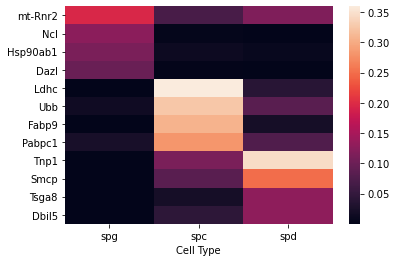

In [28]:
#int_df = sharp.run_interpretation()

#int_df.columns = keys
#reorg_keys = ["spg","spc","spd"]
#int_df = int_df[reorg_keys]
#int_df = int_df.abs()
keep_genes = int_df.sort_values("spg", ascending=False).head(4).index.tolist()
keep_genes += int_df.sort_values("spc", ascending=False).head(4).index.tolist()
keep_genes += int_df.sort_values("spd", ascending=False).head(4).index.tolist()
ax = sns.heatmap(int_df.loc[keep_genes,:])
ax.set(xlabel="Cell Type")

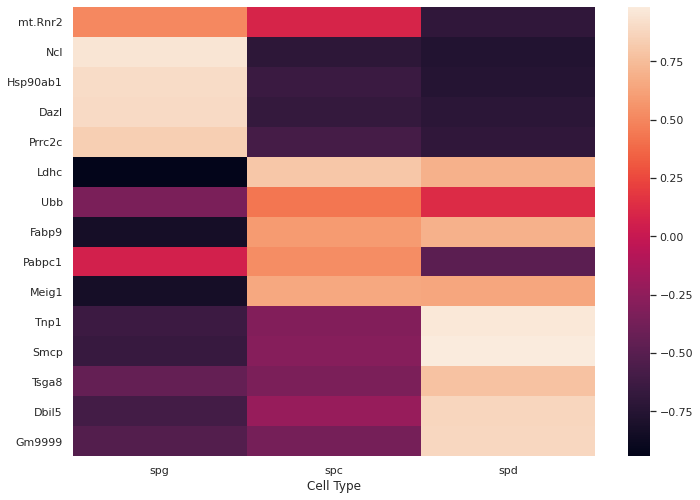

In [24]:
expr = pd.read_csv("figures/testis_expr.csv", index_col=0)
expr = np.arcsinh(expr)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(expr)
ax.set(xlabel="Cell Type")
plt.plot()
plt.savefig("figures/jung_expr_heatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [16]:
int_df.loc["Aurka"]

spg    0.001166
spc    0.008381
spd    0.000387
Name: Aurka, dtype: float64

In [17]:
#spc,Insl6,Piwil1,Pttg1,Spag6,Mllt10,Aurka
keep_genes = int_df.sort_values("spc", ascending=False).head(10).index.tolist()
#keep_genes = int_df.sort_values("spd", ascending=False).head(10).index.tolist()
#keep_genes = int_df.sort_values("spg", ascending=False).head(10).index.tolist()
int_df.loc[keep_genes,:]

,spg,spc,spd
Ldhc,0.001254,0.359617,0.038904
Ubb,0.015172,0.325207,0.083532
Fabp9,0.001195,0.307363,0.020371
Pabpc1,0.022872,0.282038,0.075385
Meig1,0.001429,0.248299,0.018715
Calm2,0.024387,0.242530,0.010826
Calm1,0.003014,0.218585,0.036050
Tuba3b,0.009845,0.203808,0.038230
Lyar,0.005533,0.201818,0.049424
Morf4l1,0.004483,0.194731,0.038400


In [23]:
umap_embedding = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/jung/umap_embedding.csv", index_col=0)
umap_embedding['real labels'] = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/jung/labels.csv", index_col=0).iloc[:,0]

umap_embedding['confident labels'] = sharp.confident_labels
map_dict = {-1:"unknown", 0:"spc", 1:"spd", 2:"spg"}
umap_embedding['confident labels'] = umap_embedding["confident labels"].map(map_dict)

<AxesSubplot:xlabel='UMAP_1', ylabel='UMAP_2'>

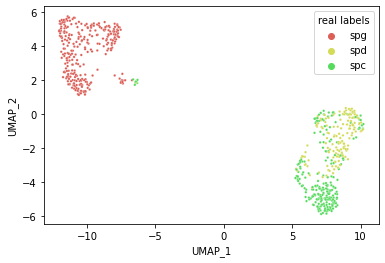

In [24]:
sns.scatterplot(data=umap_embedding, x="UMAP_1", y="UMAP_2", hue="real labels", s=6,  palette=dict(spg='#db5f57', spd="#d3db57", spc = "#57db5f"))

<AxesSubplot:xlabel='UMAP_1', ylabel='UMAP_2'>

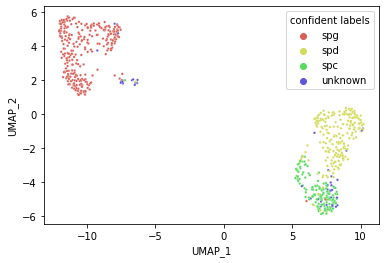

In [26]:
sns.scatterplot(data=umap_embedding, x="UMAP_1", y="UMAP_2", hue="confident labels", s=6,  palette=dict(spg='#db5f57', spd="#d3db57", spc = "#57db5f", unknown='#5f57db'))

In [15]:
all_labels_original = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/jung/preds.csv", index_col=0)
scina_preds_original,_ = pd.factorize(all_labels_original.scina, sort=True)
sctype_preds_original,_ = pd.factorize(all_labels_original.sctype, sort=True)
scsorter_preds_original,_ = pd.factorize(all_labels_original.scsorter, sort=True)
print(_)

Index(['spc', 'spd', 'spg'], dtype='object')


In [28]:
def get_class_accuracy(conf_mat, labels):
    label_count = 0
    for i in range(conf_mat.shape[0]):
        if conf_mat.shape[0] > len(labels) and i ==0: continue
        print(labels[label_count])
        print(conf_mat[i,i] / sum(conf_mat[i,:]))
        label_count +=1

In [25]:
for i in range(results[1].shape[0]):
    print(i)

0
1
2
3


In [29]:
results = utilities.validation_metrics(torch.tensor(real_labels[keep_cells]), torch.tensor(scina_preds_original), train_nodes, test_nodes)
print(results)
get_class_accuracy(results[1], keys)

(0.5390173196792603, array([[  0,   0,   0,   0],
       [152,  33,  51,   8],
       [ 77,   4,  74,   1],
       [ 25,   0,   1, 266]]), 0.5773993730545044, array([[  0,   0,   0,   0],
       [122,  33,  51,   6],
       [ 73,   4,  74,   1],
       [ 15,   0,   1, 266]]), 0.0, array([[ 0,  0,  0,  0],
       [30,  0,  0,  2],
       [ 4,  0,  0,  0],
       [10,  0,  0,  0]]))
spc
0.13524590163934427
spd
0.47435897435897434
spg
0.910958904109589


In [30]:
results = utilities.validation_metrics(torch.tensor(real_labels[keep_cells]), torch.tensor(sctype_preds_original), train_nodes, test_nodes)
print(results)
get_class_accuracy(results[1], keys)

(0.8482658863067627, array([[  0,   0,   0,   0],
       [  8, 167,  68,   1],
       [  1,  16, 139,   0],
       [ 11,   0,   0, 281]]), 0.8637771010398865, array([[  0,   0,   0,   0],
       [  1, 144,  66,   1],
       [  0,  16, 136,   0],
       [  4,   0,   0, 278]]), 0.6304348111152649, array([[ 0,  0,  0,  0],
       [ 7, 23,  2,  0],
       [ 1,  0,  3,  0],
       [ 7,  0,  0,  3]]))
spc
0.6844262295081968
spd
0.8910256410256411
spg
0.9623287671232876


In [31]:
results = utilities.validation_metrics(torch.tensor(real_labels[keep_cells]), torch.tensor(scsorter_preds_original), train_nodes, test_nodes)
print(results)
get_class_accuracy(results[1], keys)

(0.7745664715766907, array([[  0,   0,   0,   0],
       [ 26, 120,  86,  12],
       [  5,  14, 137,   0],
       [  9,   4,   0, 279]]), 0.8281733989715576, array([[  0,   0,   0,   0],
       [ 19, 119,  72,   2],
       [  4,  11, 137,   0],
       [  2,   1,   0, 279]]), 0.021739130839705467, array([[ 0,  0,  0,  0],
       [ 7,  1, 14, 10],
       [ 1,  3,  0,  0],
       [ 7,  3,  0,  0]]))
spc
0.4918032786885246
spd
0.8782051282051282
spg
0.9554794520547946


In [32]:
# updated marker experiment
all_labels = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/jung/preds_att_marker_test.csv", index_col=0)
scina_preds,_ = pd.factorize(all_labels.scina, sort=True)
sctype_preds,_ = pd.factorize(all_labels.sctype, sort=True)
scsorter_preds,_ = pd.factorize(all_labels.scsorter, sort=True)
#sc_preds,_ = pd.factorize(all_labels.scina, sort=True)
#real_labels,keys = pd.factorize(all_labels, sort=True)
all_labels.head()

,scina,scsorter,sctype
CGTTCCGACGT,spg,spg,spg
ATGCAGTACCG,spg,spg,spg
GCTGCGCCTCG,spg,spg,spg
GACCAAGGCAC,NaN,spc,spc
GGGCTTTGCCA,spg,spg,spg


In [33]:
results = utilities.validation_metrics(torch.tensor(real_labels[keep_cells]), torch.tensor(scina_preds), train_nodes, test_nodes)
print(results)
get_class_accuracy(results[1], keys)

(0.6575144529342651, array([[  0,   0,   0,   0],
       [141,  40,  55,   8],
       [ 11,  16, 127,   2],
       [  4,   0,   0, 288]]), 0.6842105388641357, array([[  0,   0,   0,   0],
       [113,  40,  53,   6],
       [ 10,  16, 124,   2],
       [  4,   0,   0, 278]]), 0.28260868787765503, array([[ 0,  0,  0,  0],
       [28,  0,  2,  2],
       [ 1,  0,  3,  0],
       [ 0,  0,  0, 10]]))
spc
0.16393442622950818
spd
0.8141025641025641
spg
0.9863013698630136


In [34]:
results = utilities.validation_metrics(torch.tensor(real_labels[keep_cells]), torch.tensor(sctype_preds), train_nodes, test_nodes)
print(results)
get_class_accuracy(results[1], keys)

(0.8482658863067627, array([[  0,   0,   0,   0],
       [  8, 167,  68,   1],
       [  1,  16, 139,   0],
       [ 11,   0,   0, 281]]), 0.8637771010398865, array([[  0,   0,   0,   0],
       [  1, 144,  66,   1],
       [  0,  16, 136,   0],
       [  4,   0,   0, 278]]), 0.6304348111152649, array([[ 0,  0,  0,  0],
       [ 7, 23,  2,  0],
       [ 1,  0,  3,  0],
       [ 7,  0,  0,  3]]))
spc
0.6844262295081968
spd
0.8910256410256411
spg
0.9623287671232876


In [35]:
results = utilities.validation_metrics(torch.tensor(real_labels[keep_cells]), torch.tensor(scsorter_preds), train_nodes, test_nodes)
print(results)
get_class_accuracy(results[1], keys)

(0.8424855470657349, array([[151,  81,  12],
       [ 14, 141,   1],
       [  1,   0, 291]]), 0.8560371398925781, array([[133,  75,   4],
       [ 13, 139,   0],
       [  1,   0, 281]]), 0.6521739363670349, array([[18,  6,  8],
       [ 1,  2,  1],
       [ 0,  0, 10]]))
spc
0.6188524590163934
spd
0.9038461538461539
spg
0.9965753424657534


In [10]:
print(results[1])

[[  0   0   0   0]
 [141  40  55   8]
 [ 11  16 127   2]
 [  4   0   0 288]]


In [12]:
conf_mat = results[1]
for i in [0,1,2,3]:
    print(i-1)
    print(conf_mat[i,i])
    print(conf_mat[i,:])
    print(conf_mat[i,i] / sum(conf_mat[i,:]))

-1
0
[0 0 0 0]
nan
0
40
[141  40  55   8]
0.16393442622950818
1
127
[ 11  16 127   2]
0.8141025641025641
2
288
[  4   0   0 288]
0.9863013698630136


<ipython-input-12-0b3b14f8b341>:6: RuntimeWarning: invalid value encountered in long_scalars
  print(conf_mat[i,i] / sum(conf_mat[i,:]))
